In [7]:
from shifter import *

In [36]:
def show(elements, transpose=False, big=False,timecourse=False):
    if big:
        plt.figure(figsize=(20,10))
    else:
        plt.figure()
    if transpose:
        plt.imshow(elements.transpose())
    else:
        plt.axis('off')
        plt.imshow(elements)
    plt.colorbar()
    plt.grid(b=None)
    plt.show(block=False)
    if timecourse:
        Vt = elements
        Vt = Vt[24:,:]
        plt.figure(figsize=(15,3))
        window=5
        plt.plot(np.convolve(np.sum(Vt[:,51:151],axis=1), np.ones(window)/window))
        plt.plot(np.convolve(np.sum(Vt[:,151:251],axis=1), np.ones(window)/window))
        plt.plot(np.convolve(np.sum(Vt[:,251:351],axis=1), np.ones(window)/window))
        plt.plot(np.convolve(np.sum(Vt[:,351:],axis=1), np.ones(window)/window))
        plt.show()

In [9]:
W = np.load('connFinal.npy')

In [10]:
plot_W(W)

In [26]:
V1,V2,V3,Vt,aN,pW,p,pAt=combine_shifter_PCRN(W, num_samples=1,set_seed=1)
p/1000

Computing results input sample: 1


array([[0.239, 0.128, 0.633]])

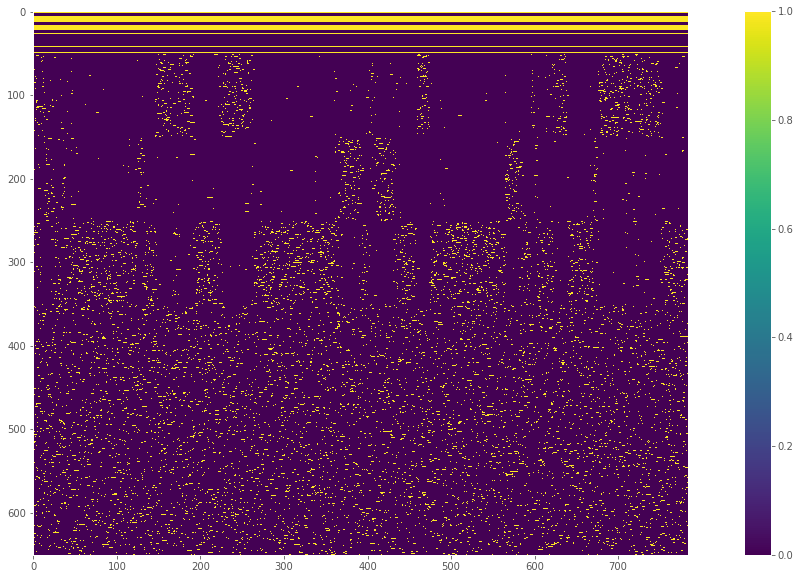

In [41]:
show(Vt,transpose=True,big=True)


In [40]:
Vt = Vt[24:,:]
plt.figure(figsize=(15,3))
window=5
plt.plot(np.convolve(np.sum(Vt[:,51:151],axis=1), np.ones(window)/window))
plt.plot(np.convolve(np.sum(Vt[:,151:251],axis=1), np.ones(window)/window))
plt.plot(np.convolve(np.sum(Vt[:,251:351],axis=1), np.ones(window)/window))
plt.plot(np.convolve(np.sum(Vt[:,351:],axis=1), np.ones(window)/window))
plt.show()

In [52]:
data_frac = {}
data_frac['left'] = []
data_frac['stay'] = []
data_frac['right'] = []
every_t = range(100,1001,100)
for i in every_t:
    V1,V2,V3,Vt,aN,pW,p,pAt=combine_shifter_PCRN(W, num_samples=1,set_seed=1,tSteps=i,verbose=False)
    data_frac['left'].append(p[0,0]/i)
    data_frac['stay'].append(p[0,1]/i)
    data_frac['right'].append(p[0,2]/i)

plt.figure()
plt.plot(every_t,data_frac['left'],label='left')
plt.plot(every_t,data_frac['stay'],label='stay')
plt.plot(every_t,data_frac['right'],label='right')
plt.legend()
plt.show()

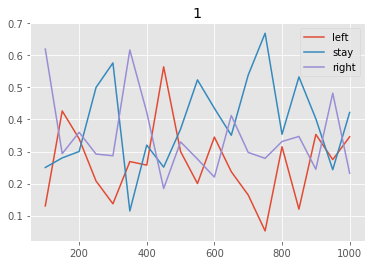

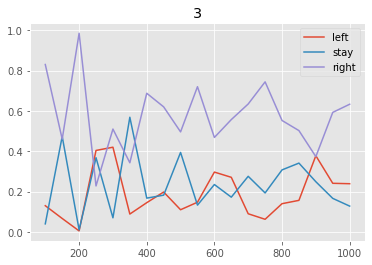

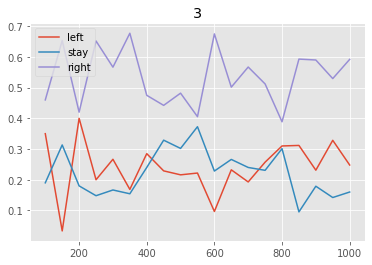

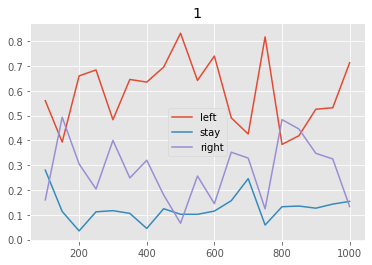

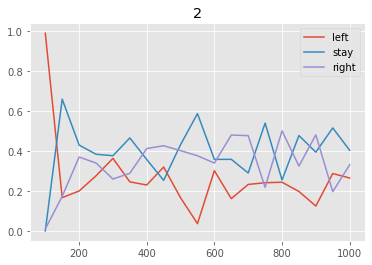

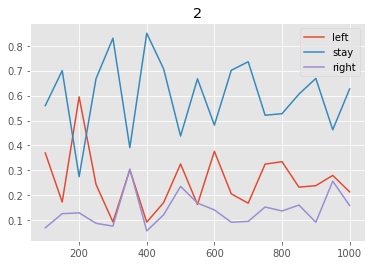

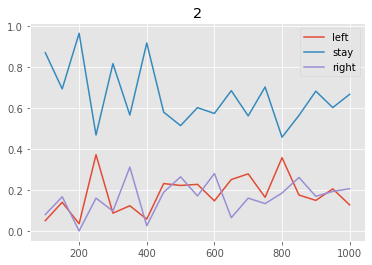

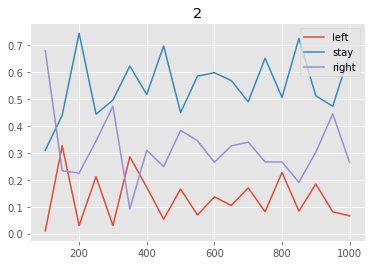

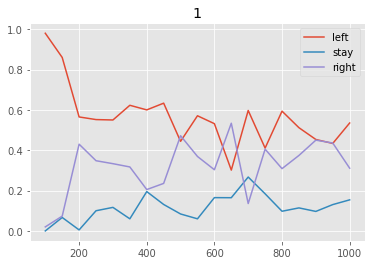

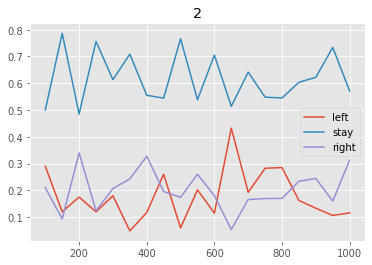

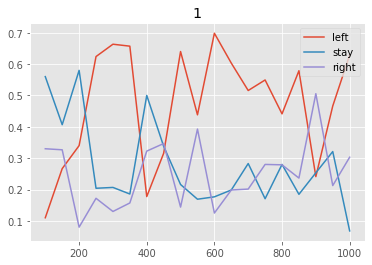

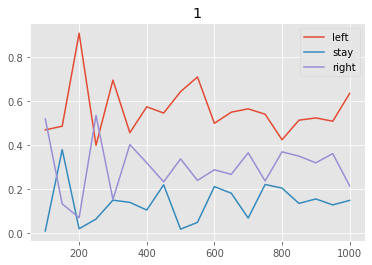

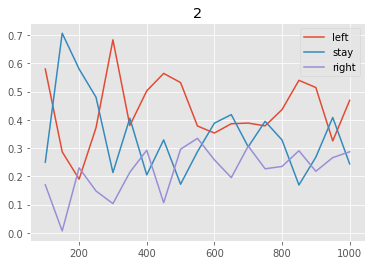

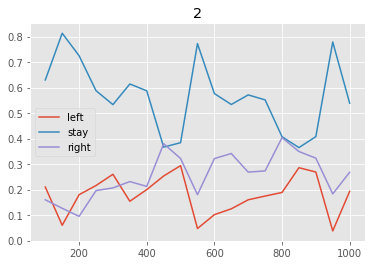

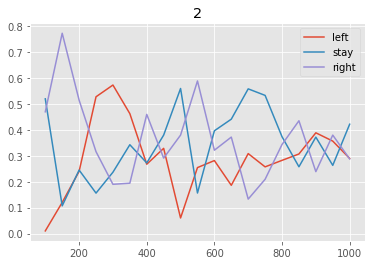

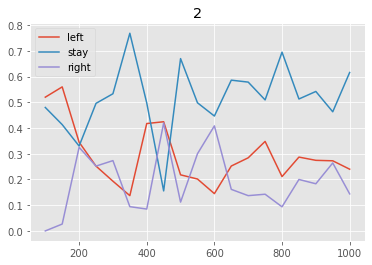

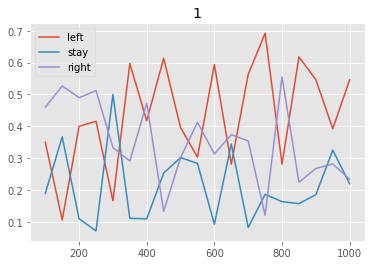

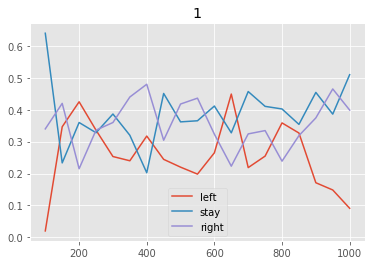

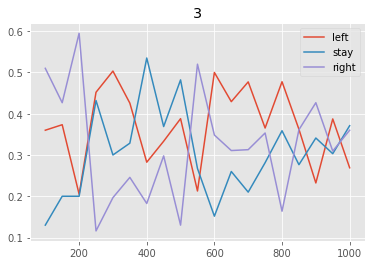

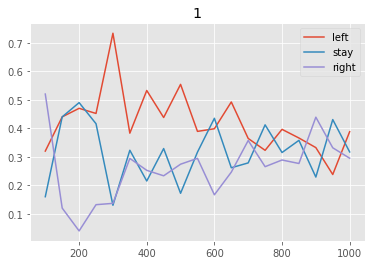

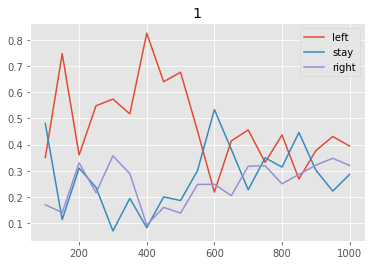

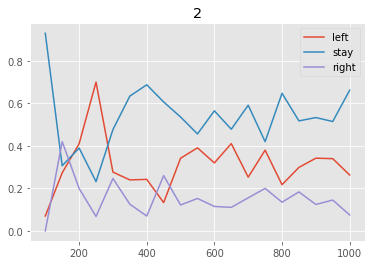

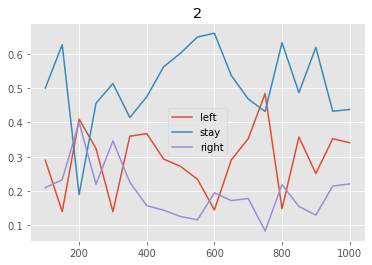

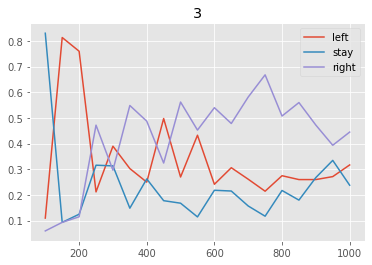

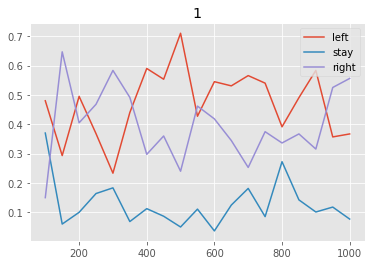

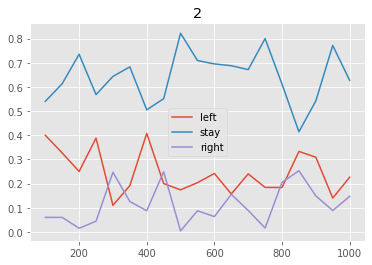

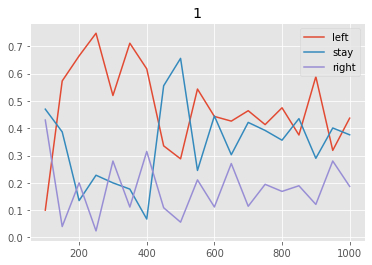

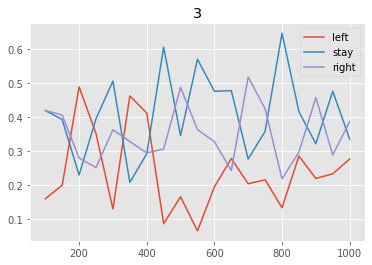

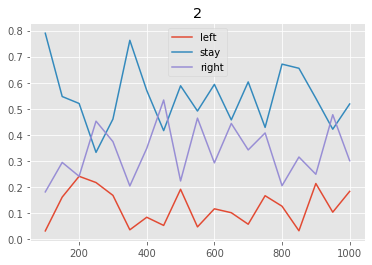

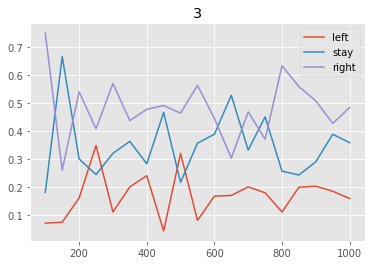

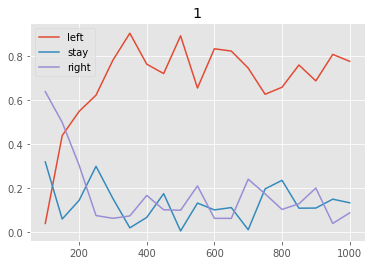

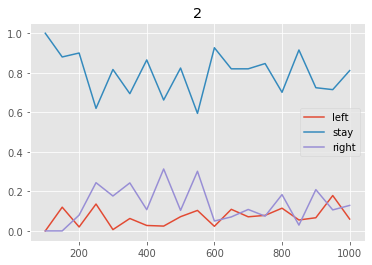

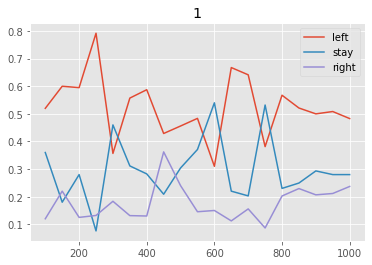

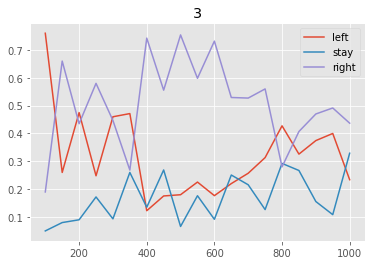

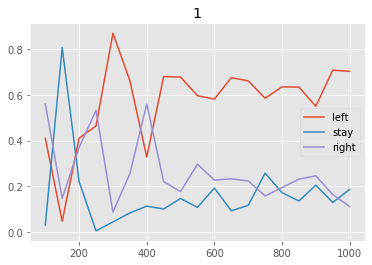

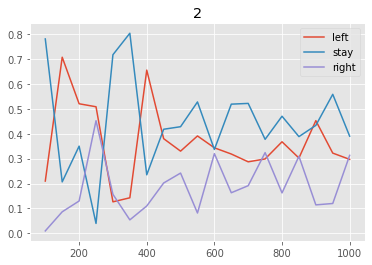

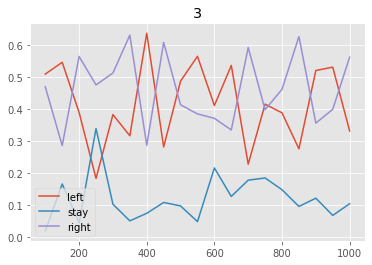

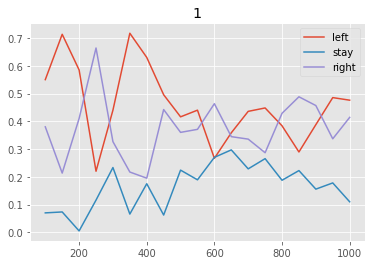

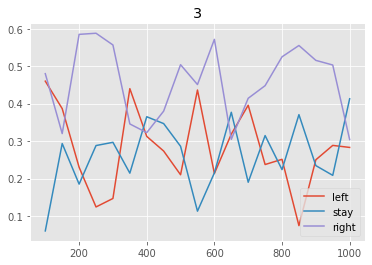

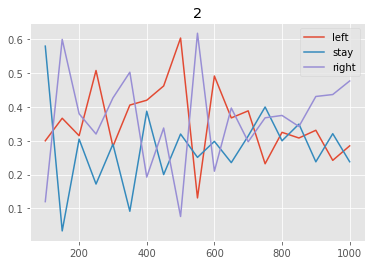

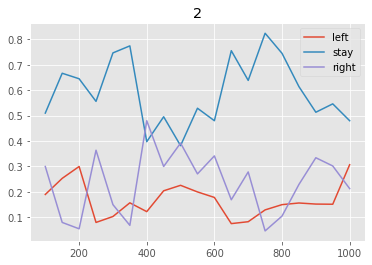

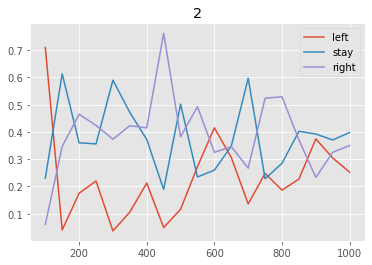

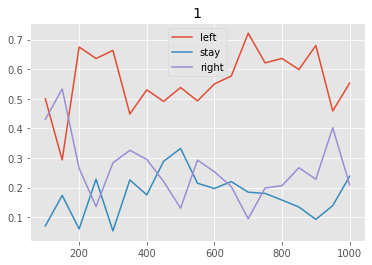

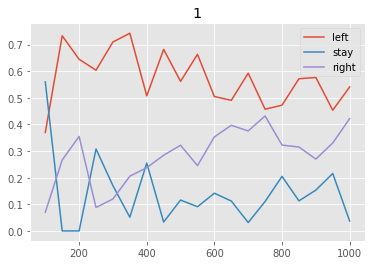

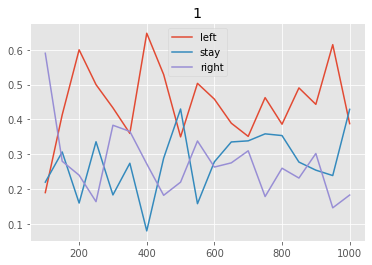

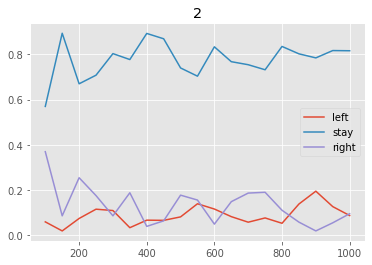

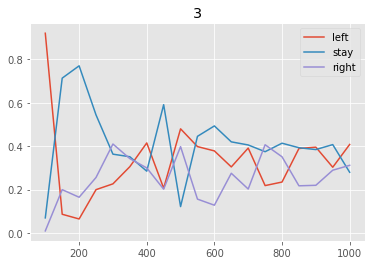

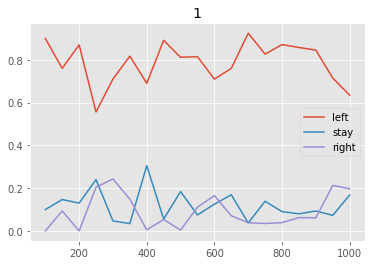

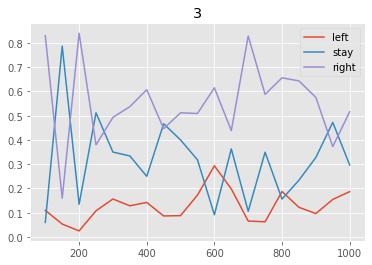

In [107]:
data_left = {}
data_left['left'] = []
data_left['stay'] = []
data_left['right'] = []
data_stay = {}
data_stay['left'] = []
data_stay['stay'] = []
data_stay['right'] = []
data_right = {}
data_right['left'] = []
data_right['stay'] = []
data_right['right'] = []
left_count = 0
stay_count = 0
right_count = 0
s = 0
samples = 10

while (left_count < samples or stay_count < samples or right_count < samples):
    
    data_frac = {}
    data_frac['left'] = []
    data_frac['stay'] = []
    data_frac['right'] = []
    every_t = range(100,1001,100)
    
    for i in every_t:
        V1,V2,V3,Vt,aN,pW,p,pAt=combine_shifter_PCRN(W, num_samples=1,set_seed=s,tSteps=i,verbose=False)
        data_frac['left'].append(p[0,0]/i)
        data_frac['stay'].append(p[0,1]/i)
        data_frac['right'].append(p[0,2]/i)
        
    if np.argmax(V3) == 0 and left_count < samples:
        data_left['left'].append(data_frac['left'])
        data_left['stay'].append(data_frac['stay'])
        data_left['right'].append(data_frac['right'])
        left_count += 1
    elif np.argmax(V3) == 1 and stay_count < samples:
        data_stay['left'].append(data_frac['left'])
        data_stay['stay'].append(data_frac['stay'])
        data_stay['right'].append(data_frac['right'])
        stay_count += 1
    elif np.argmax(V3) == 2 and right_count < samples:
        data_right['left'].append(data_frac['left'])
        data_right['stay'].append(data_frac['stay'])
        data_right['right'].append(data_frac['right'])
        right_count += 1
    
    plt.figure()
    plt.title(str(np.argmax(V3)+1))
    plt.plot(every_t,data_frac['left'],label='left')
    plt.plot(every_t,data_frac['stay'],label='stay')
    plt.plot(every_t,data_frac['right'],label='right')
    plt.legend()
    plt.show()
    
    s+=1
    

In [108]:
print(left_count, stay_count, right_count)

20 20 20


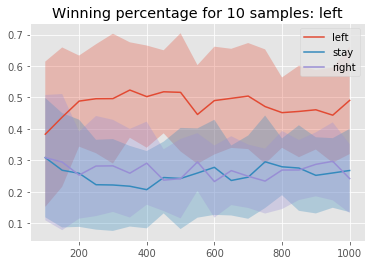

In [109]:
shifts_title = ['left','stay','right']
i=0
for d in [data_left, data_stay, data_right]:
    plot_left = np.mean(np.array(d['left']),axis=0)
    std_left = np.std(np.array(d['left']),axis=0)
    plot_stay = np.mean(np.array(d['stay']),axis=0)
    std_stay = np.std(np.array(d['stay']),axis=0)
    plot_right = np.mean(np.array(d['right']),axis=0)
    std_right = np.std(np.array(d['right']),axis=0)

    plt.figure()
    plt.title('Winning percentage for 10 samples: '+shifts_title[i])
    plt.plot(every_t,plot_left,label='left')
    plt.fill_between(every_t,plot_left-std_left,plot_left+std_left,alpha=0.3)
    plt.plot(every_t,plot_stay,label='stay')
    plt.fill_between(every_t,plot_stay-std_stay,plot_stay+std_stay,alpha=0.3)
    plt.plot(every_t,plot_right,label='right')
    plt.fill_between(every_t,plot_right-std_right,plot_right+std_right,alpha=0.3)
    plt.legend()
    plt.show()
    
    i+=1